<a href="https://colab.research.google.com/github/BenxiaHu/DeepLearning/blob/main/FullyConnectedNetwork_CRE_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda:0
Epoch 0: Train Loss = 1.0474647283554077, Test Loss = 1.0012648105621338
Epoch 10: Train Loss = 1.0169942378997803, Test Loss = 0.9986579418182373
Epoch 20: Train Loss = 1.019635796546936, Test Loss = 0.9985882639884949


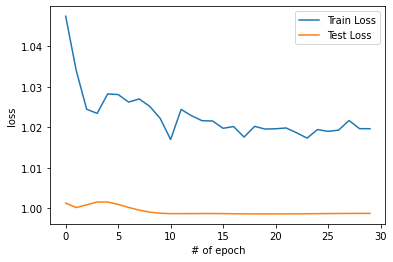

In [34]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network architecture
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        # Set weight for connections from A to the first hidden layer
        self.fc1.weight.data[:, 0] = abs(self.fc1.weight.data[:, 1])
        # Set weight for connections from C to the first hidden layer
        self.fc1.weight.data[:, 3] = abs(self.fc1.weight.data[:, 3])
        # Set weight for connections from B to the first hidden layer
        self.fc1.weight.data[:, 1] = abs(self.fc1.weight.data[:, 1]) * (-1)
        # Set weight for connections from C to the first hidden layer
        self.fc1.weight.data[:, 2] = abs(self.fc1.weight.data[:, 2]) * (-1)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5) # Dropout layer

    def forward(self, A, B, C, D):
        x = torch.cat((A, B, C, D), dim=1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x


# Generate some dummy input and output data for testing
A_train = torch.randn(7000, 1)
#torch.is_tensor(A_train)
B_train = torch.randn(7000, 1)
C_train = torch.randn(7000, 1)
D_train = torch.randn(7000, 1)
E_train = torch.randn(7000, 1)

A_test = torch.randn(3000, 1)
B_test = torch.randn(3000, 1)
C_test = torch.randn(3000, 1)
D_test = torch.randn(3000, 1)
E_test = torch.randn(3000, 1)

# Move the data and the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = MyNet().to(device)


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses = []
test_losses = []


for epoch in range(100):
    # Train the model on the training data
    model.train()
    optimizer.zero_grad()
    outputs = model(A_train.to(device), B_train.to(device), C_train.to(device), D_train.to(device))
    train_loss = criterion(outputs, E_train.to(device))
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Evaluate the model on the test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(A_test.to(device), B_test.to(device), C_test.to(device), D_test.to(device))
        test_loss = criterion(test_outputs, E_test.to(device))
        test_losses.append(test_loss.item())

        # Print the loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_loss.item()}, Test Loss = {test_loss.item()}")
        # check the loss is
        # Check if the change in training loss is significant
        if epoch > 1:
            if abs(train_losses[-2] - train_losses[-1]) < 0.00001:
                break

# Plot the training and test losses over time
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel("# of epoch")
plt.ylabel("loss")
plt.show()

#print(epoch)
#print(train_losses)
#train_losses[0]
#(train_losses[-2] - train_losses[-1])